# Task 4

In [112]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [113]:
data = pd.read_csv("Country-data.csv")
dic = pd.read_csv("data-dictionary.csv")

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [115]:
print(dic.to_string())

  Column Name                                                                                                       Description
0     country                                                                                               Name of the country
1  child_mort                                                       Death of children under 5 years of age per 1000 live births
2     exports               Exports of goods and services per capita. Given in % of the GDP (Gross Domestic Product) per capita
3      health                                                    Total health spending per capita. Given in % of GDP per capita
4     imports                                        Imports of goods and services per capita. Given in % of the GDP per capita
5      Income                                                                                             Net income per person
6   Inflation                                                        The measurement of the annual growt

In [116]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [117]:
country_gdpp = data.groupby('country')['gdpp'].median().reset_index()
country_income = data.groupby('country')['income'].median().reset_index()
country_life_expec = data.groupby('country')['life_expec'].median().reset_index()

fig = px.choropleth(
    country_gdpp,
    locations="country",
    locationmode="country names",
    color="gdpp",
    hover_name="country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="GDP per capita"
)
fig.update_layout(
    width=1600,
    height=900
)
fig.show()

fig = px.choropleth(
    country_income,
    locations="country",
    locationmode="country names",
    color="income",
    hover_name="country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Income"
)
fig.update_layout(
    width=1600,
    height=900
)
fig.show()

fig = px.choropleth(
    country_life_expec,
    locations="country",
    locationmode="country names",
    color="life_expec",
    hover_name="country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Life Expectancy"
)
fig.update_layout(
    width=1600,
    height=900
)
fig.show()


In [118]:
data_no_country = data.drop("country", axis=1)
economical = ["exports", "imports", "income", "inflation", "gdpp", "health"]
health = ["child_mort", "life_expec", "total_fer"]
data_no_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


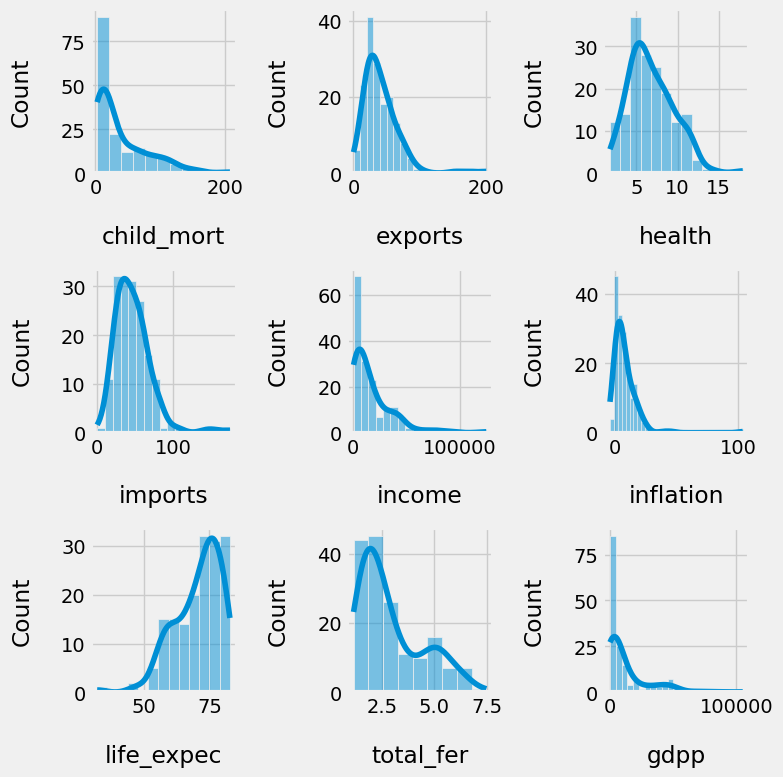

In [137]:
fig, ax = plt.subplots(3,3, figsize=(8,8))
for i, col in enumerate(data_no_country.columns):
    sns.histplot(data_no_country[col], kde=True, ax=ax[i//3, i%3])
    ax[i//3, i%3].xaxis.labelpad = 20
    ax[i//3, i%3].yaxis.labelpad = 20
plt.tight_layout()
plt.show()

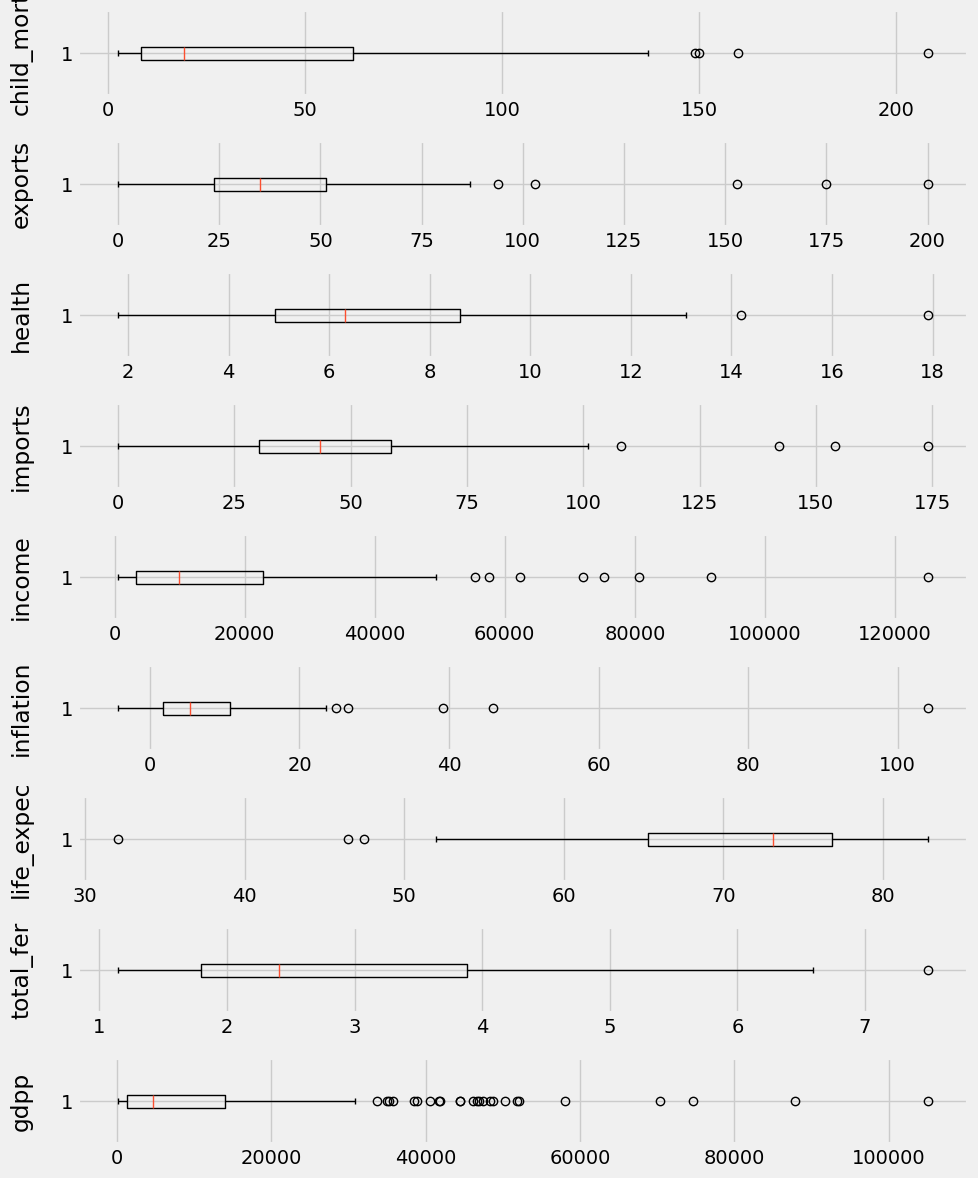

In [120]:
fig, axes = plt.subplots(9,1, figsize=(10, 12))
for i, col in enumerate(data_no_country.columns):
    axes[i].boxplot(data_no_country[col], vert=False)
    axes[i].set_ylabel(col)
    axes[i].xaxis.labelpad = 20
    axes[i].yaxis.labelpad = 20
plt.tight_layout()
plt.show()

significant number of outliers

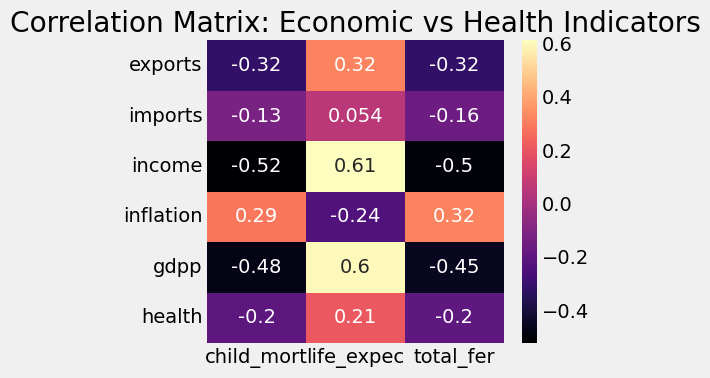

In [121]:
corr_matrix = pd.DataFrame(index=economical, columns=health)
for eco in economical:
    for hlth in health:
        corr_matrix.loc[eco, hlth] = data_no_country[eco].corr(data_no_country[hlth])
corr_matrix = corr_matrix.astype(float)
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, cmap="magma", annot=True)
plt.title("Correlation Matrix: Economic vs Health Indicators")
plt.tight_layout()
plt.show()

scaling because ML doesn't understand units
--> standardscaler

In [122]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data_no_country)
scaled = pd.DataFrame(scaled, columns=data_no_country.columns, index=data_no_country.index[:])
scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [123]:
pca = PCA(n_components=9)
pca_data = pd.DataFrame(pca.fit_transform(scaled), columns=[f"pc{i}" for i in range(1,10)], index= data_no_country.index)
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

max variance 4.16 and 1.56 at pc1 and pc2
1. 41.6% variance
2. 15.6% variance

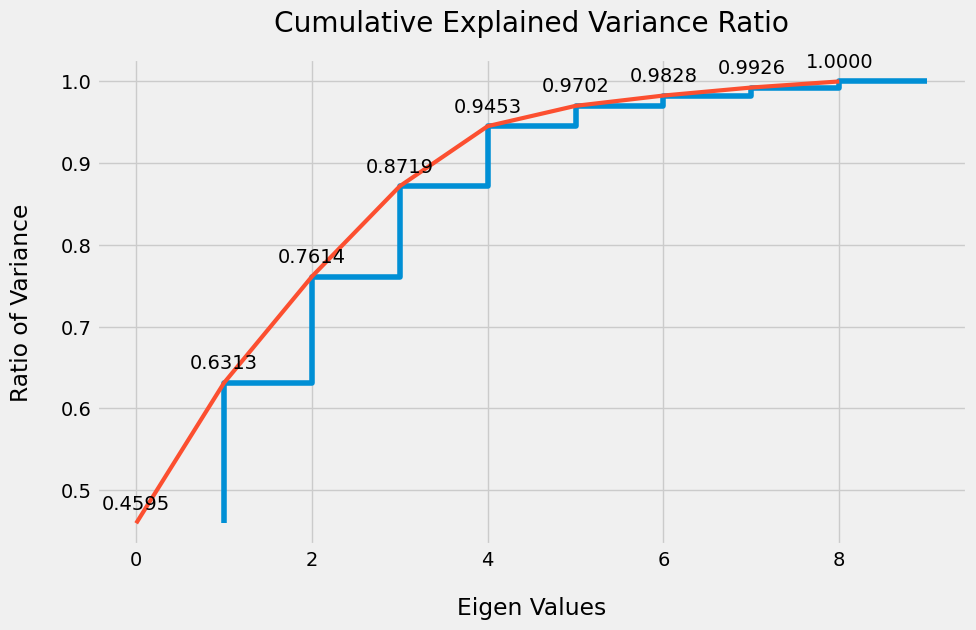

In [124]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.step(range(1, 10), cumulative_variance)
plt.plot(cumulative_variance, linewidth=3)

for i, var in enumerate(cumulative_variance):
    plt.annotate(f'{var:.4f}', (i, var), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Eigen Values', labelpad=20)
plt.ylabel('Ratio of Variance', labelpad=20)
plt.title('Cumulative Explained Variance Ratio', pad=20)
plt.show()

- added up variances of all features
- eigen values > 95% select
--> eigen value 5

In [125]:
pca_data = pca_data.drop(columns= [f"pc{i}" for i in range(6,10)])
pca_data


,pc1,pc2,pc3,pc4,pc5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


KMeans
- optimal k with elbow

In [126]:
cluster_range = range(2, 11)
n_init_values = range(6, 17, 2)
max_iter_values = range(100, 501, 50)
results = []

# K-means für verschiedene n_clusters, n_init und max_iter ausführen
for n_clusters in cluster_range:
    for n_init in n_init_values:
        for max_iter in max_iter_values:
            kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter,
                            init='k-means++')
            kmeans.fit(pca_data)
            inertia = kmeans.inertia_
            silhouette_avg = silhouette_score(pca_data, kmeans.labels_)
            results.append((n_clusters, n_init, max_iter, inertia, silhouette_avg))

# Ergebnisse in ein DataFrame umwandeln
results_df = pd.DataFrame(results, columns=['n_clusters', 'n_init', 'max_iter', 'inertia', 'silhouette_avg'])
results_df.describe()

,n_clusters,n_init,max_iter,inertia,silhouette_avg
count,486.000000,486.00000,486.000000,486.000000,486.000000
mean,6.000000,11.00000,300.000000,539.219313,0.280020
std,2.584649,3.41917,129.232469,198.440753,0.033359
min,2.000000,6.00000,100.000000,324.437293,0.219867
25%,4.000000,8.00000,200.000000,381.083322,0.250302
50%,6.000000,11.00000,300.000000,470.187599,0.272189
75%,8.000000,14.00000,400.000000,619.061938,0.307977
max,10.000000,16.00000,500.000000,968.466353,0.335665


Beste Kombination:
n_clusters          6.000000
n_init              8.000000
max_iter          400.000000
inertia           489.834914
silhouette_avg      0.335665
Name: 231, dtype: float64


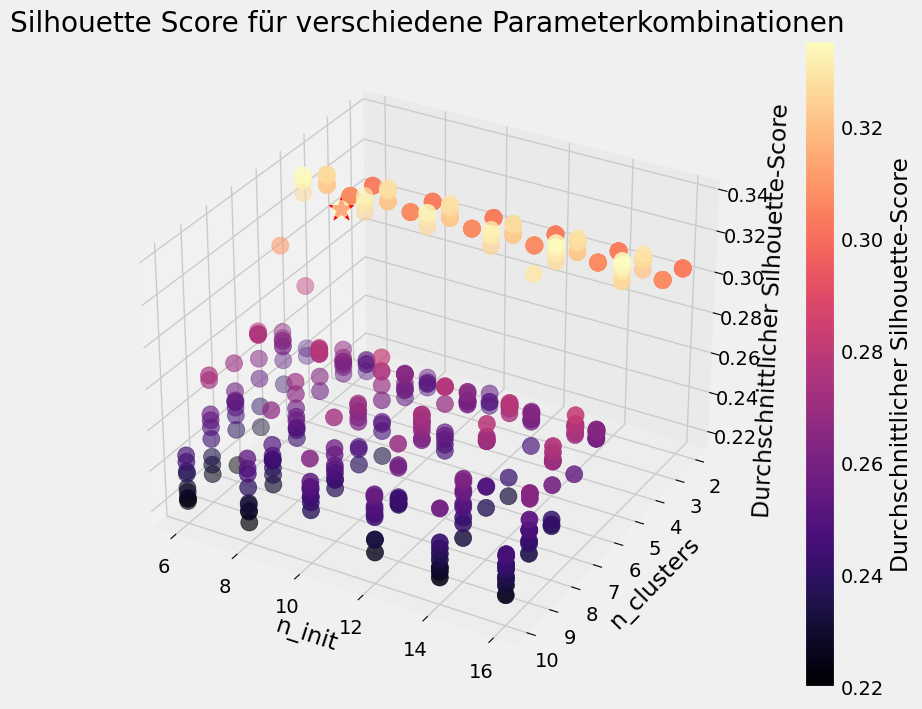

In [138]:
best_combination = results_df.loc[results_df['silhouette_avg'].idxmax()]
best_x = best_combination['n_init']
best_y = best_combination['n_clusters']
best_z = best_combination['silhouette_avg']
print("Beste Kombination:")
print(best_combination)

# Grafische Darstellung der Ergebnisse in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Werte für die Achsen definieren
y = results_df['n_clusters']
x = results_df['n_init']
z = results_df['silhouette_avg']

# Scatter-Plot erstellen
scatter = ax.scatter(x, y, z, c=z, cmap='magma', marker='o', s = 150)
ax.scatter(best_x, best_y, best_z, c='red', s=350, marker='*', label='Beste Kombination')
# Achsenbeschriftungen hinzufügen
ax.set_xlabel('n_init')
ax.set_ylabel('n_clusters')
ax.set_zlabel('Durchschnittlicher Silhouette-Score')
ax.invert_yaxis()
# Farbskala hinzufügen
cbar = plt.colorbar(scatter)
cbar.set_label('Durchschnittlicher Silhouette-Score')

plt.title('Silhouette Score für verschiedene Parameterkombinationen')
plt.show()

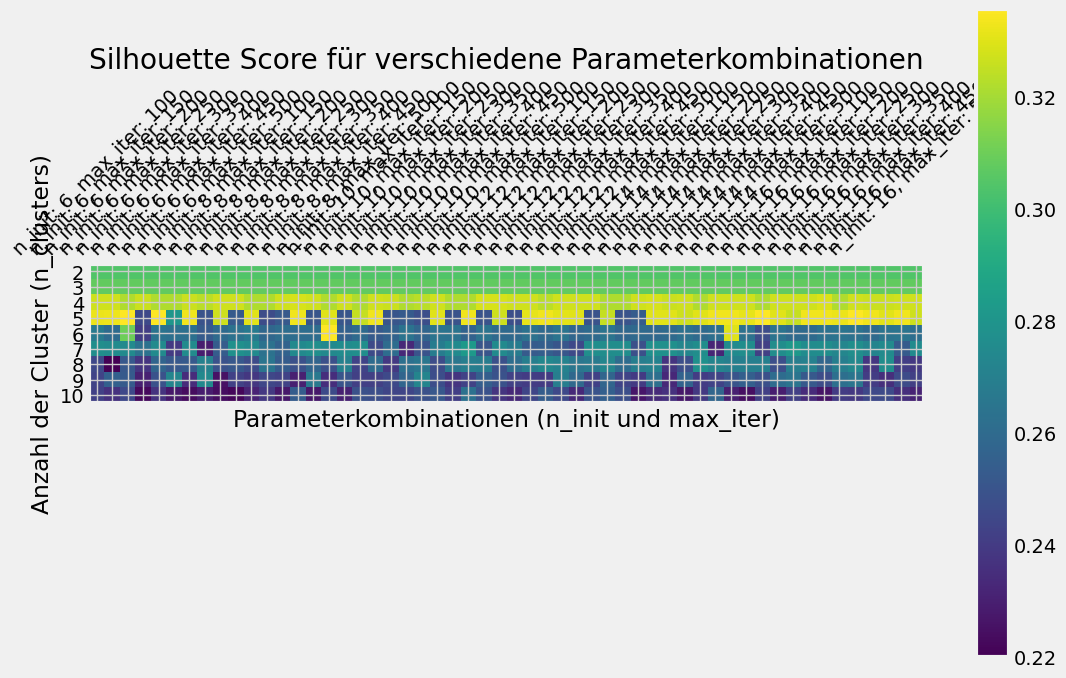

In [128]:
fig, ax = plt.subplots(figsize=(12, 8))

# Pivot-Tabelle für die Visualisierung erstellen
pivot_df = results_df.pivot_table(index='n_clusters', columns=['n_init', 'max_iter'], values='silhouette_avg')

# Heatmap erstellen
cax = ax.matshow(pivot_df, cmap='viridis')
plt.colorbar(cax)

# Achsenbeschriftungen hinzufügen
ax.set_xticks(np.arange(len(pivot_df.columns)))
ax.set_xticklabels([f'n_init: {x[0]}, max_iter: {x[1]}' for x in pivot_df.columns], rotation=45)
ax.set_yticks(np.arange(len(pivot_df.index)))
ax.set_yticklabels(pivot_df.index)

plt.title('Silhouette Score für verschiedene Parameterkombinationen')
plt.xlabel('Parameterkombinationen (n_init und max_iter)')
plt.ylabel('Anzahl der Cluster (n_clusters)')
plt.show()

In [129]:
def elbow_optimizer(inertias, name):
    kl = KneeLocator(range(2, 11), inertias, curve='convex', direction="decreasing")
    
    plt.style.use("fivethirtyeight")
    sns.lineplot(x=range(2, 11), y=inertias, color='blue', linewidth=3) 
    plt.xticks(range(2, 11))
    plt.xlabel("Number of Clusters", labelpad=20)
    plt.ylabel("Inertia", labelpad=20)
    plt.title(f"Elbow Method for {name}", y=1.09)
    mean_inertia = results_df.groupby('n_clusters')['inertia'].mean()
    plt.axvline(x=kl.elbow, color='red', linestyle='--', label=f'optimal k = {kl.elbow}')
    min_k = mean_inertia.idxmin()
    plt.axvline(x=min_k, color='red', linestyle='--', label=f'min k = {min_k}')
    plt.grid(True)
    plt.legend()
    plt.grid()
    plt.show()

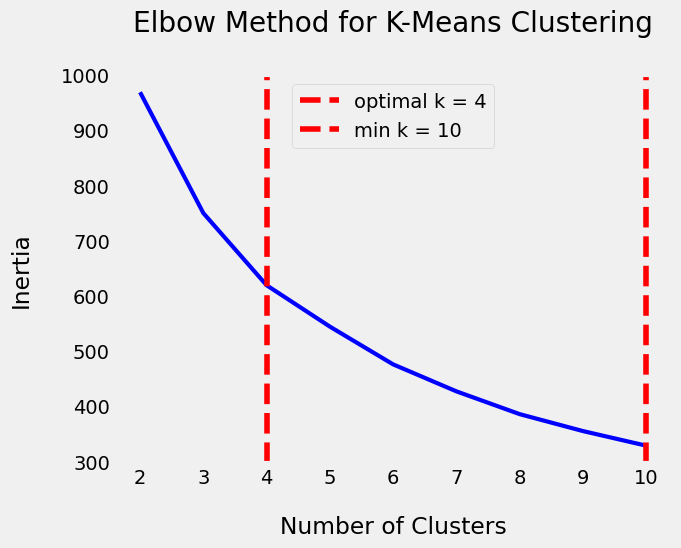

In [130]:
mean_inertia = results_df.groupby('n_clusters')['inertia'].mean()
elbow_optimizer(mean_inertia.values, "K-Means Clustering")

In [131]:
best_model = pd.DataFrame({'Model':[], 'Sil_score':[], 'CH_score':[], 'setting':[]})

kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(pca_data)
pred = kmeans.labels_
# Store the coordinates of centroids
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(data=centroids, columns = [pca_data.columns])
centroids

,pc1,pc2,pc3,pc4,pc5
0,-1.819477,0.564533,2.426467,0.535087,1.411818
1,2.769773,-0.213014,0.068886,0.866801,-0.178226
2,0.170238,-0.128372,-0.039384,-0.740898,0.116373
3,-2.531887,0.362501,-0.403923,0.682125,-0.331047


In [132]:
res = pd.concat([pca_data, pd.DataFrame(pred, columns = ["cluster"], index=pca_data.index)], axis=1)
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pc1      167 non-null    float64
 1   pc2      167 non-null    float64
 2   pc3      167 non-null    float64
 3   pc4      167 non-null    float64
 4   pc5      167 non-null    float64
 5   cluster  167 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 7.3 KB


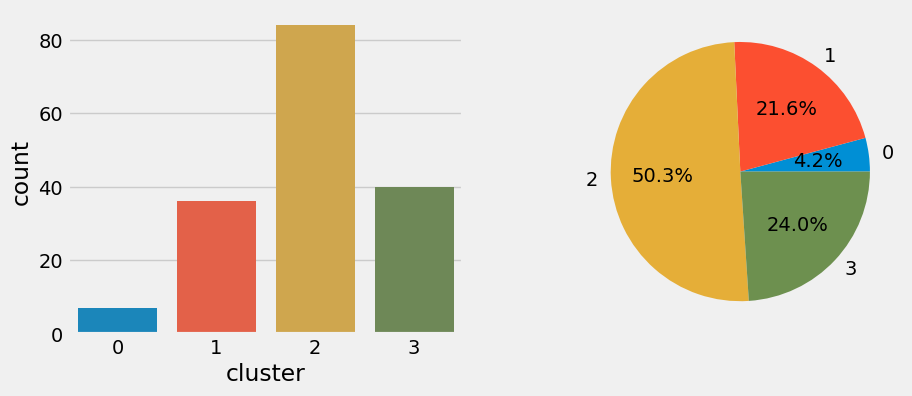

In [133]:
def check_result(data):
    """Check results obtained from each algorithm and number of clusters
        data(Dataframe): original dataset + cluster column obtained from algorithm
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Count of cluster (countplot)
    sns.countplot(data=data, x='cluster', ax=axes[0])
    
    # Draw pie plot
    slices = data['cluster'].value_counts().sort_index().values
    activities = data['cluster'].value_counts().sort_index().index
    axes[1].pie(
        slices,
        labels=activities,
        autopct='%1.1f%%'
    )
    
    plt.show()
check_result(res)    

In [134]:
fig = px.scatter_3d(res, x='pc1', y='pc2', z='pc3', color='cluster',
                    title='3D Cluster Visualization (PCA)',
                    labels={'cluster': 'Cluster'},
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

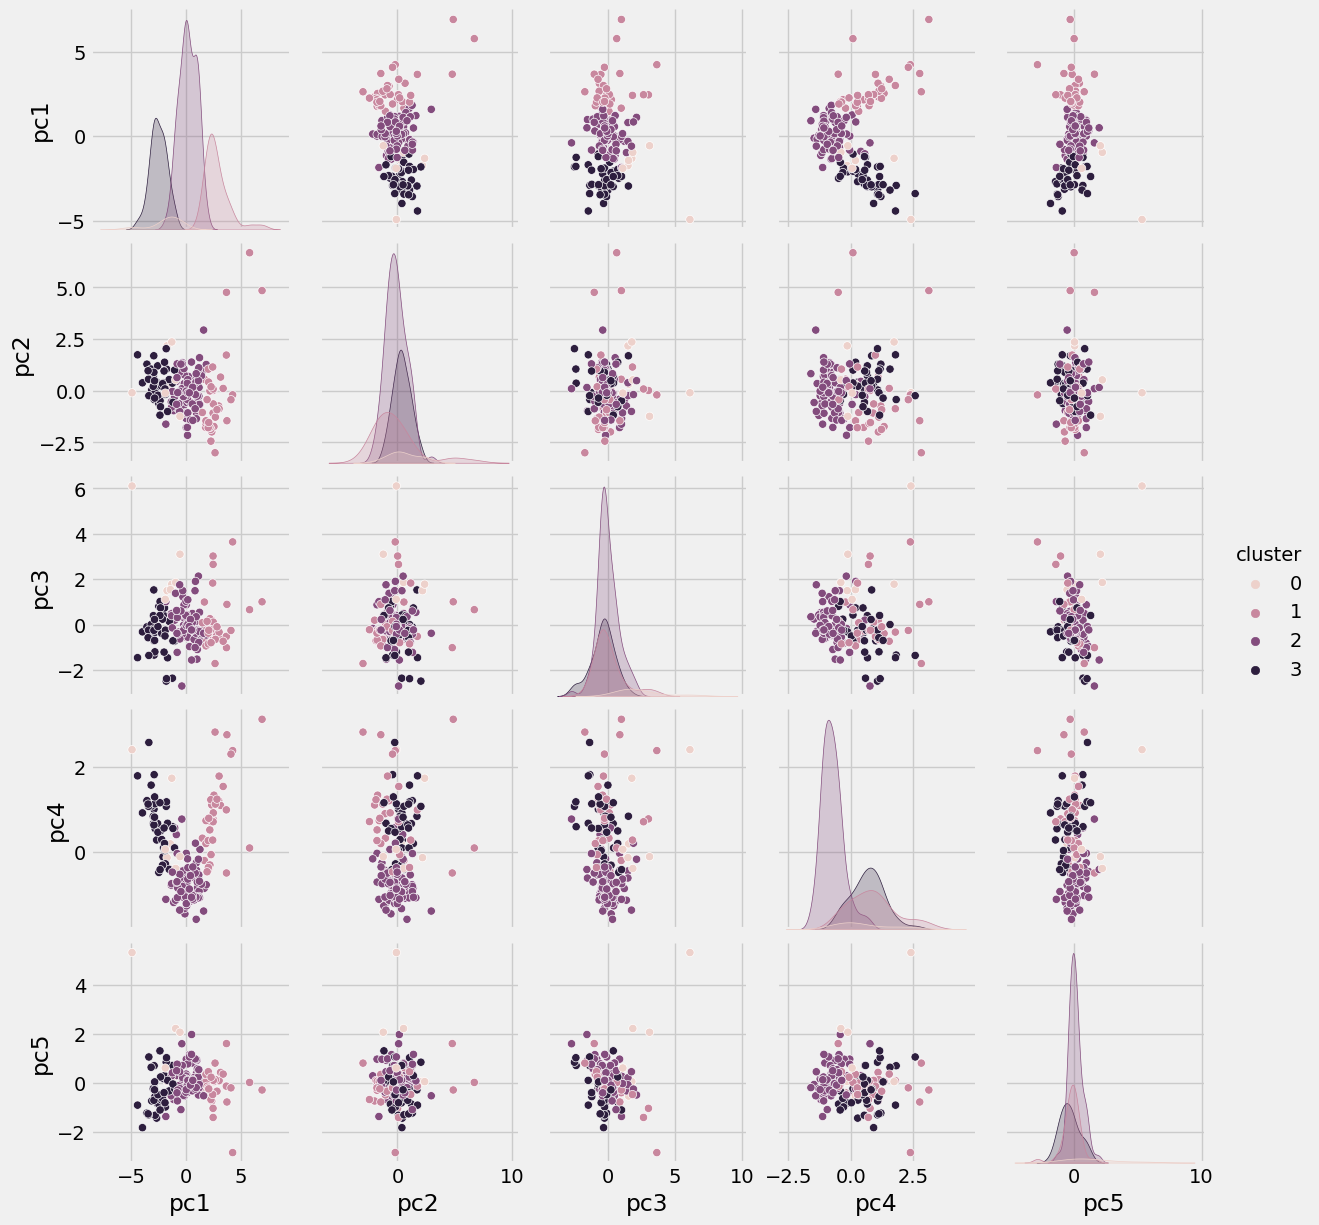

In [141]:
pairplot = sns.pairplot(res, hue="cluster")
pairplot.savefig("pairplot.png")
plt.show()